## <font color='green'>Student Performance Indicator</font>

### Index

- [Problem Statement](#ps)
- [Importing Libraries](#import)
- [Loading Data](#data)
- [Exploratory data analysis](#eda)
- [Model Training](#model)
- [Model Selection](#select)

### <font color = 'green'>Problem Statement</font><a class='anchor' id='ps'>

* The aim of this notebook is to understand how the student's performance(test scores) is affected by various other factors such as
`Gender,Ethnicity, Parental level of edication, Lunch and Test prepration score`
* Dataset link :  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### <font color = 'green'>Importing Libraries</font><a class='anchor' id='import'>

In [39]:
#basic libraries
import numpy as np
import pandas as pd

#visualinzing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

### <font color = 'green'>Loading Data</font><a class='anchor' id='data'>

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
#viewing random 5 rows
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
589,female,group A,some high school,standard,none,48,66,65
56,female,group E,associate's degree,standard,completed,82,85,86
669,male,group D,associate's degree,standard,completed,81,72,77
914,female,group B,associate's degree,free/reduced,none,46,61,55
489,male,group A,associate's degree,free/reduced,completed,79,82,82


In [4]:
#shape of data
df.shape

(1000, 8)

Dataset contains 1000 rows and 8 columns(feature)

### Dataset information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [5]:
#checking for Missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Dataset does not has in missing values

In [6]:
#check for duplicates
df.duplicated().sum()

0

No duplicated records present

In [7]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#data description
df.describe(include = 'all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


#### Insights
- most frequent gender is 'Female' so we have more data for Females
- for numeric columns  , means and stansard deviations are very close to each other
- the minimum score for math is 0 while other subject is more than that

In [10]:
# Finding unique value
print('------------------------------------')
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print('------------------------------------')
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print('------------------------------------')
print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print('------------------------------------')
print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print('------------------------------------')
print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

------------------------------------
Categories in 'gender' variable:      ['female' 'male']
------------------------------------
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
------------------------------------
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
------------------------------------
Categories in 'lunch' variable:      ['standard' 'free/reduced']
------------------------------------
Categories in 'test preparation course' variable:      ['none' 'completed']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Feature Extraction

In [15]:
#adding total score column 
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

#addind average column
df['average'] = df['total_score'] / 3

In [16]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


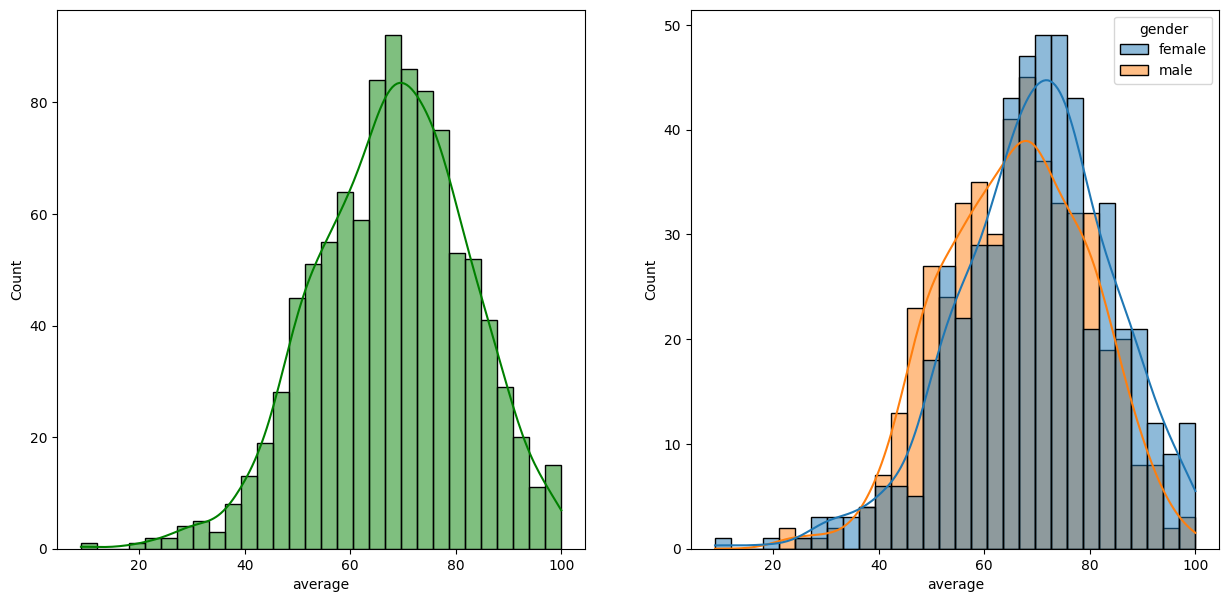

In [18]:
#plotting historgram , to see the data distribution

fig,ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color = 'g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()


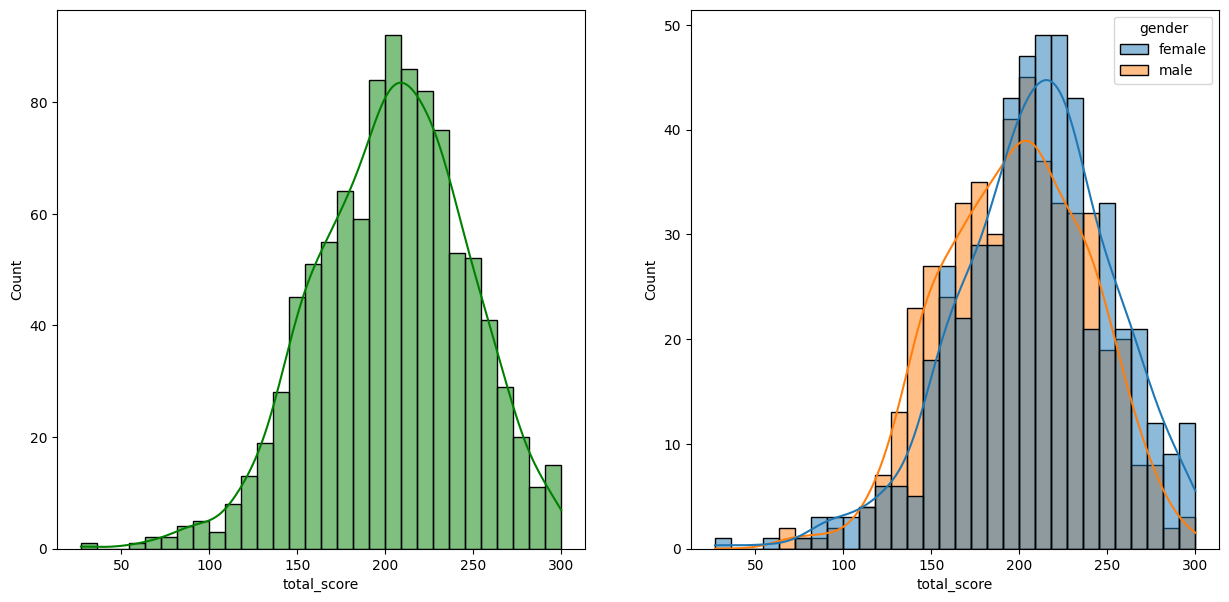

In [19]:
#plotting historgram , to see the data distribution

fig,ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color = 'g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')
plt.show()

#### Insights
- Female students have high scores as compared to male students

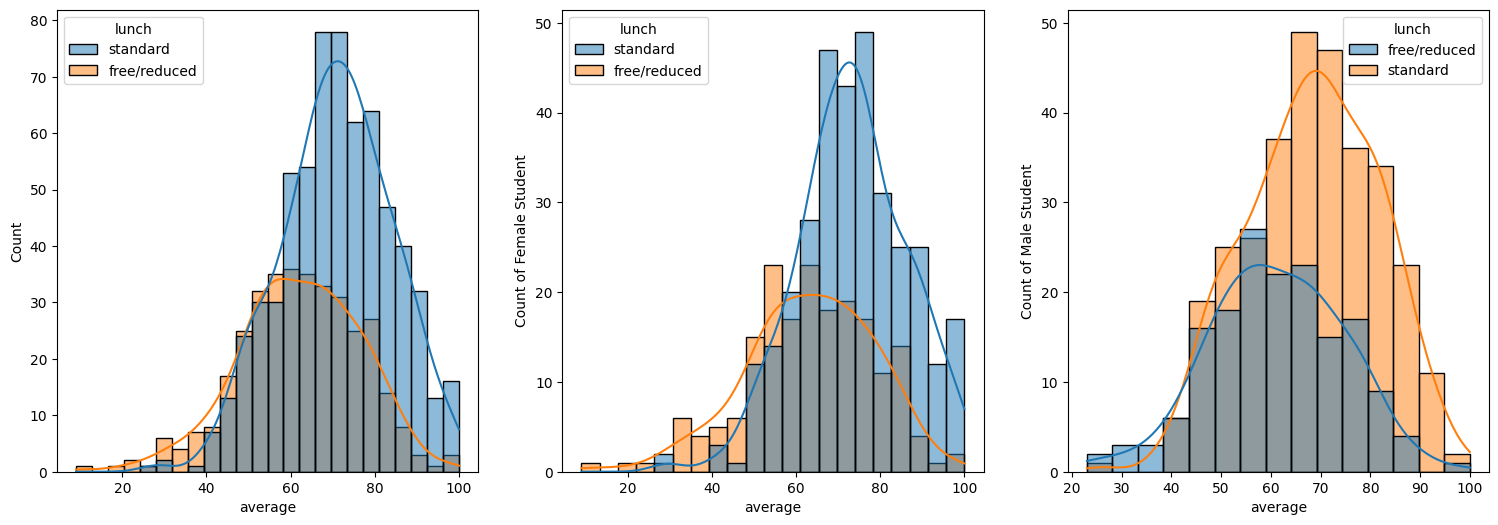

In [22]:

plt.subplots(1,3,figsize=(25,6))
plt.title('Effect of lunch on score Gender wise')
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.ylabel('Count of Female Student')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.ylabel('Count of Male Student')
plt.show()

In [24]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

#### Insights
- Lunch has a direct impact on the scores
- `Standard lunch` helps student perform well in exams irrespective of Gender

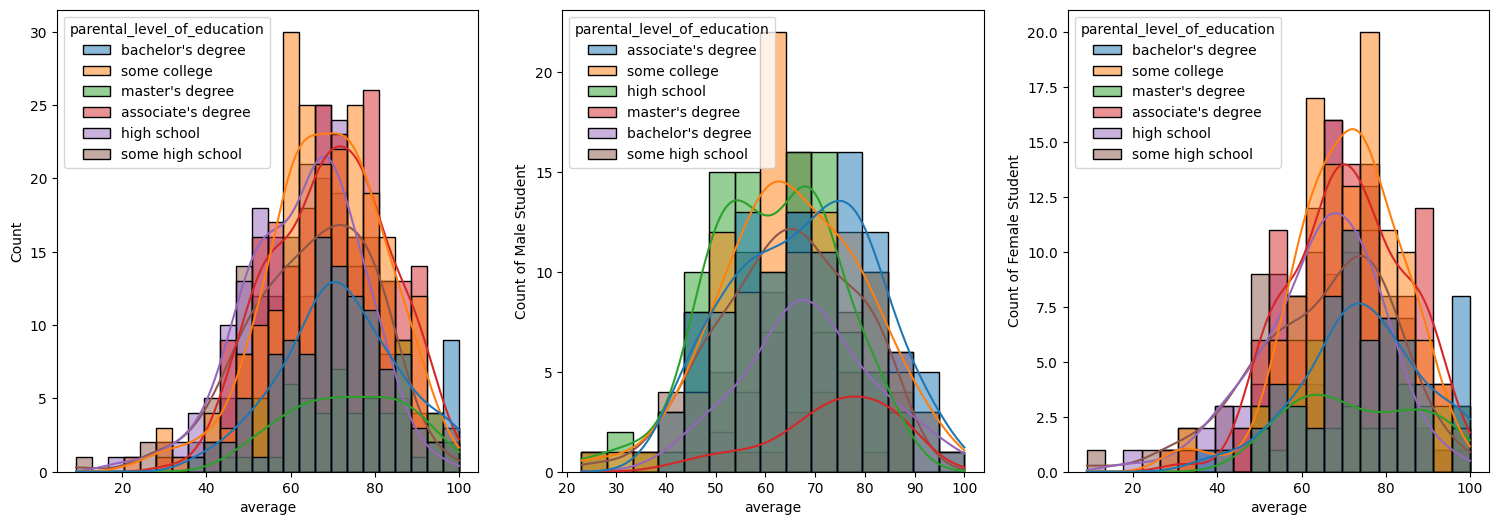

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.title('Effect of Parental level of education')
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.ylabel('Count of Male Student')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.ylabel('Count of Female Student')
plt.show()

### Insight
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of master's degree their male child tend to perform well in exam


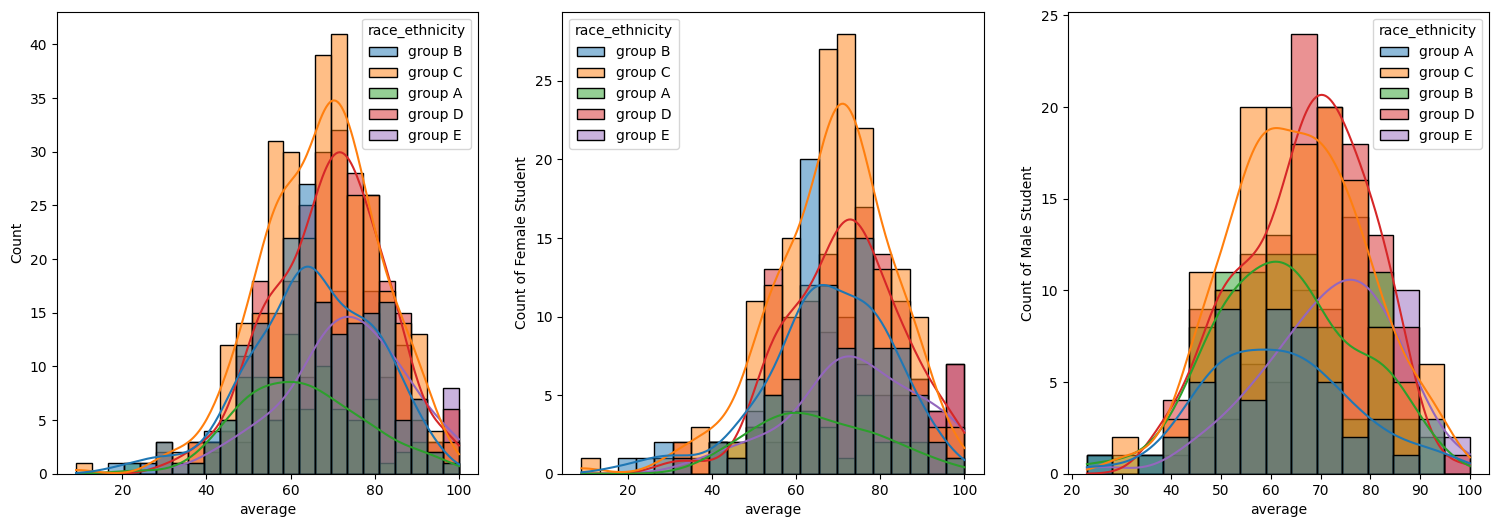

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.ylabel('Count of Female Student')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.ylabel('Count of Male Student')
plt.show()

### Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects
- Group E students have scored the highest marks.

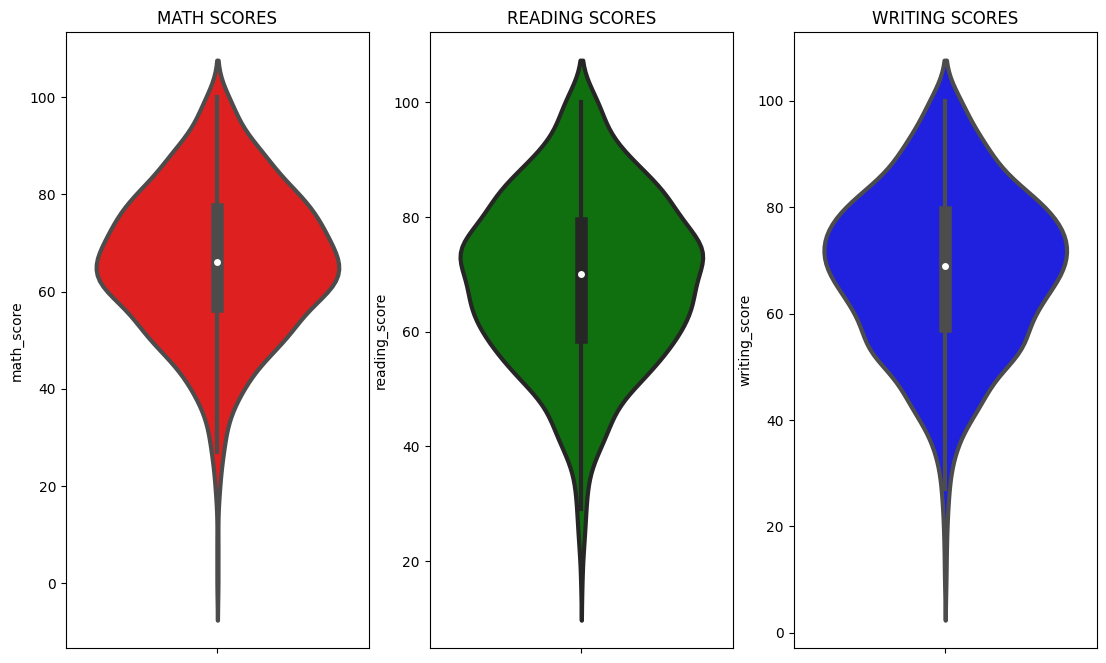

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

- From the above three plots its clearly visible that most of the students score in between 60-80  for all subject

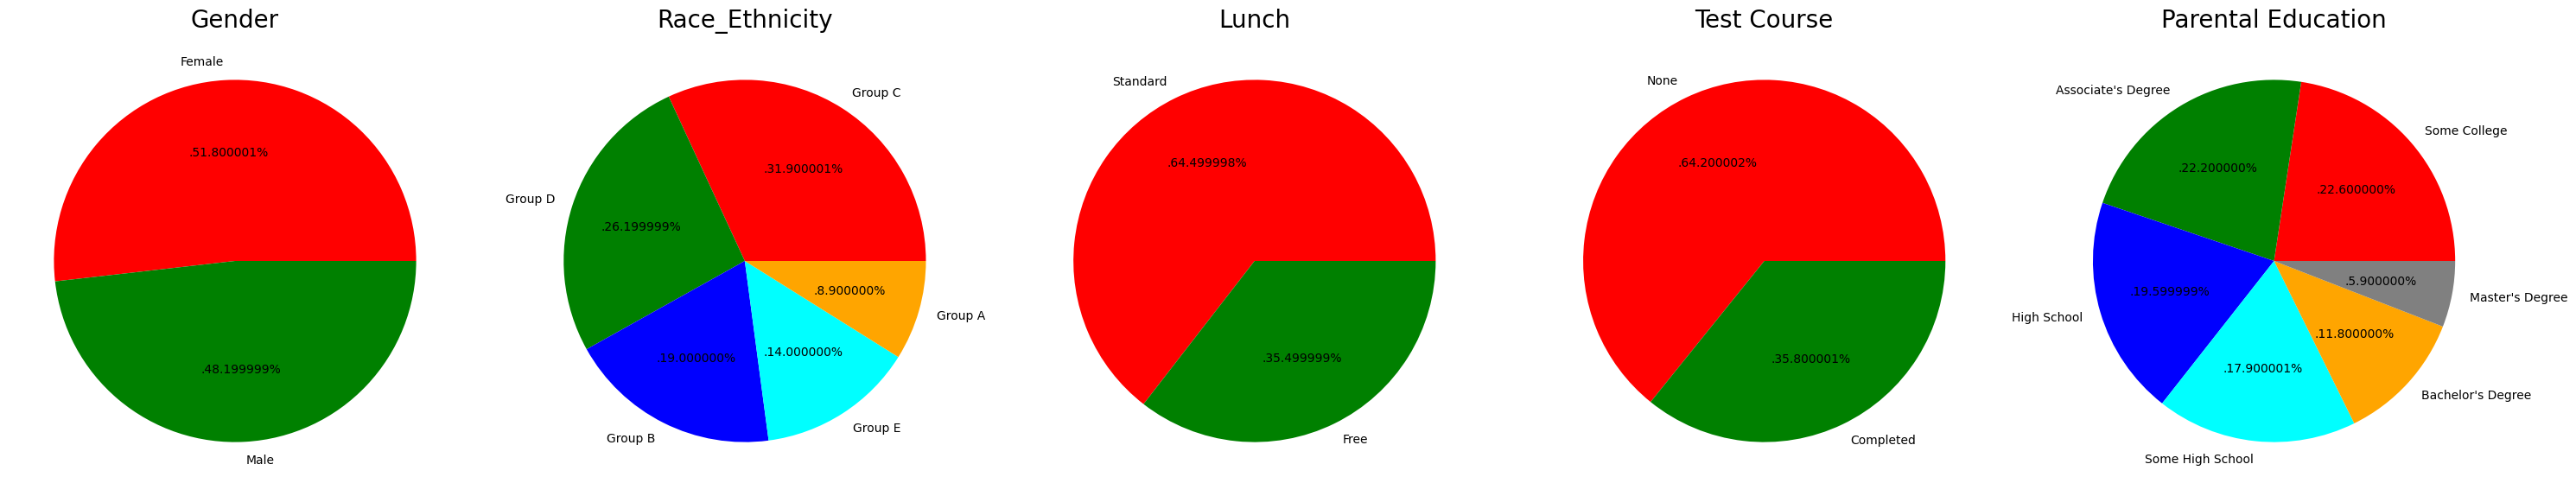

In [30]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

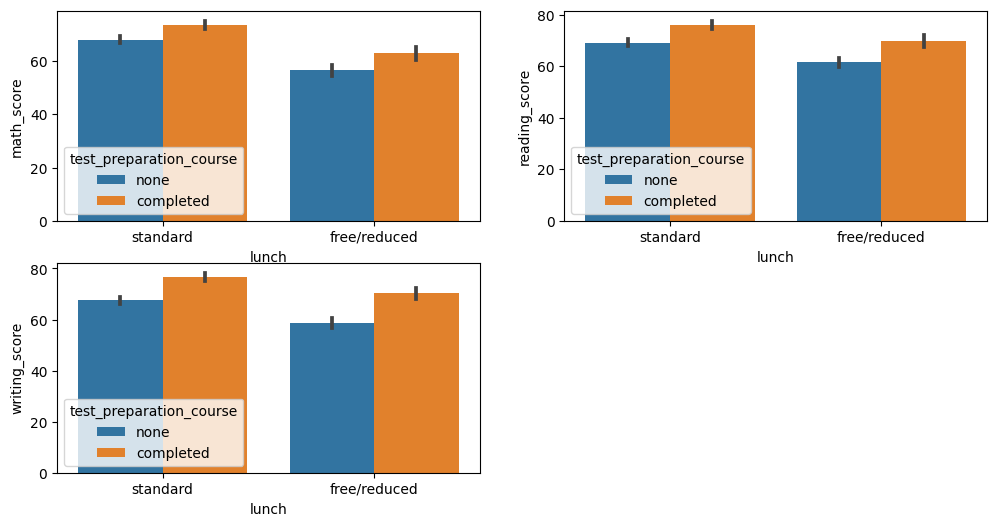

In [32]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

plt.show()

### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Checking Outlier

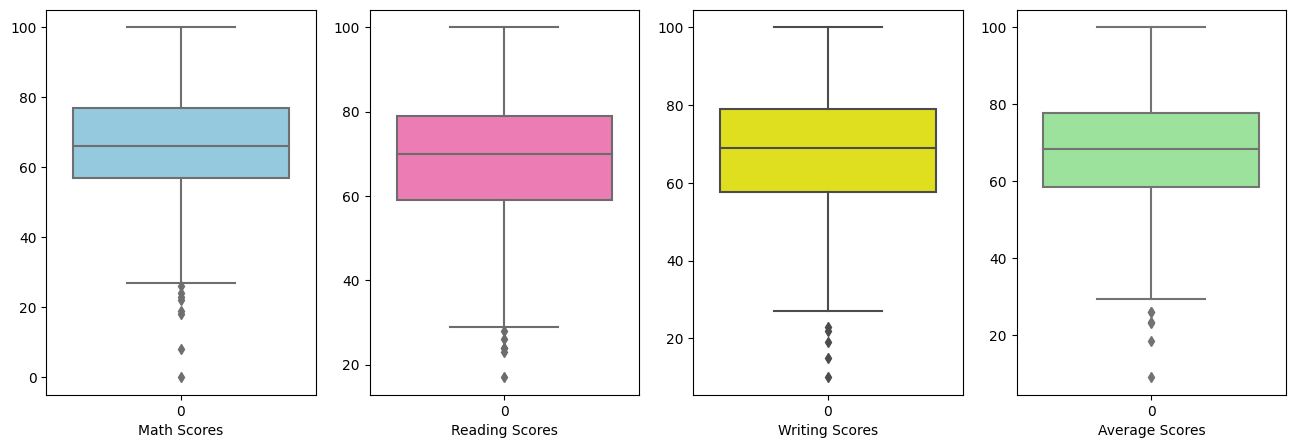

In [35]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.xlabel('Math Scores')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.xlabel('Reading Scores')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.xlabel('Writing Scores')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.xlabel('Average Scores')
plt.show()

## Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

## <font color='green'>Model Trainnning</font><a class = 'anchor' id = 'model'>

In [40]:
#splitting into X and y

X =df.drop(columns = ['math_score','average','total_score'], axis = 1)
y = df['math_score']

In [41]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [42]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include="object").columns


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]
)


In [43]:
X = preprocessor.fit_transform(X)

In [44]:
X.shape

(1000, 19)

In [45]:
#performing Train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

In [48]:
#defining evaluation function for various train models

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [49]:
#defining models

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) #training the model
    
    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluating
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

    
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3402
- Mean Absolute Error: 4.2723
- R2 Score: 0.8735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4214
- Mean Absolute Error: 4.2253
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-----------------------

In [50]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879216
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850787
8,AdaBoost Regressor,0.848812
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.749855


In [51]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.92


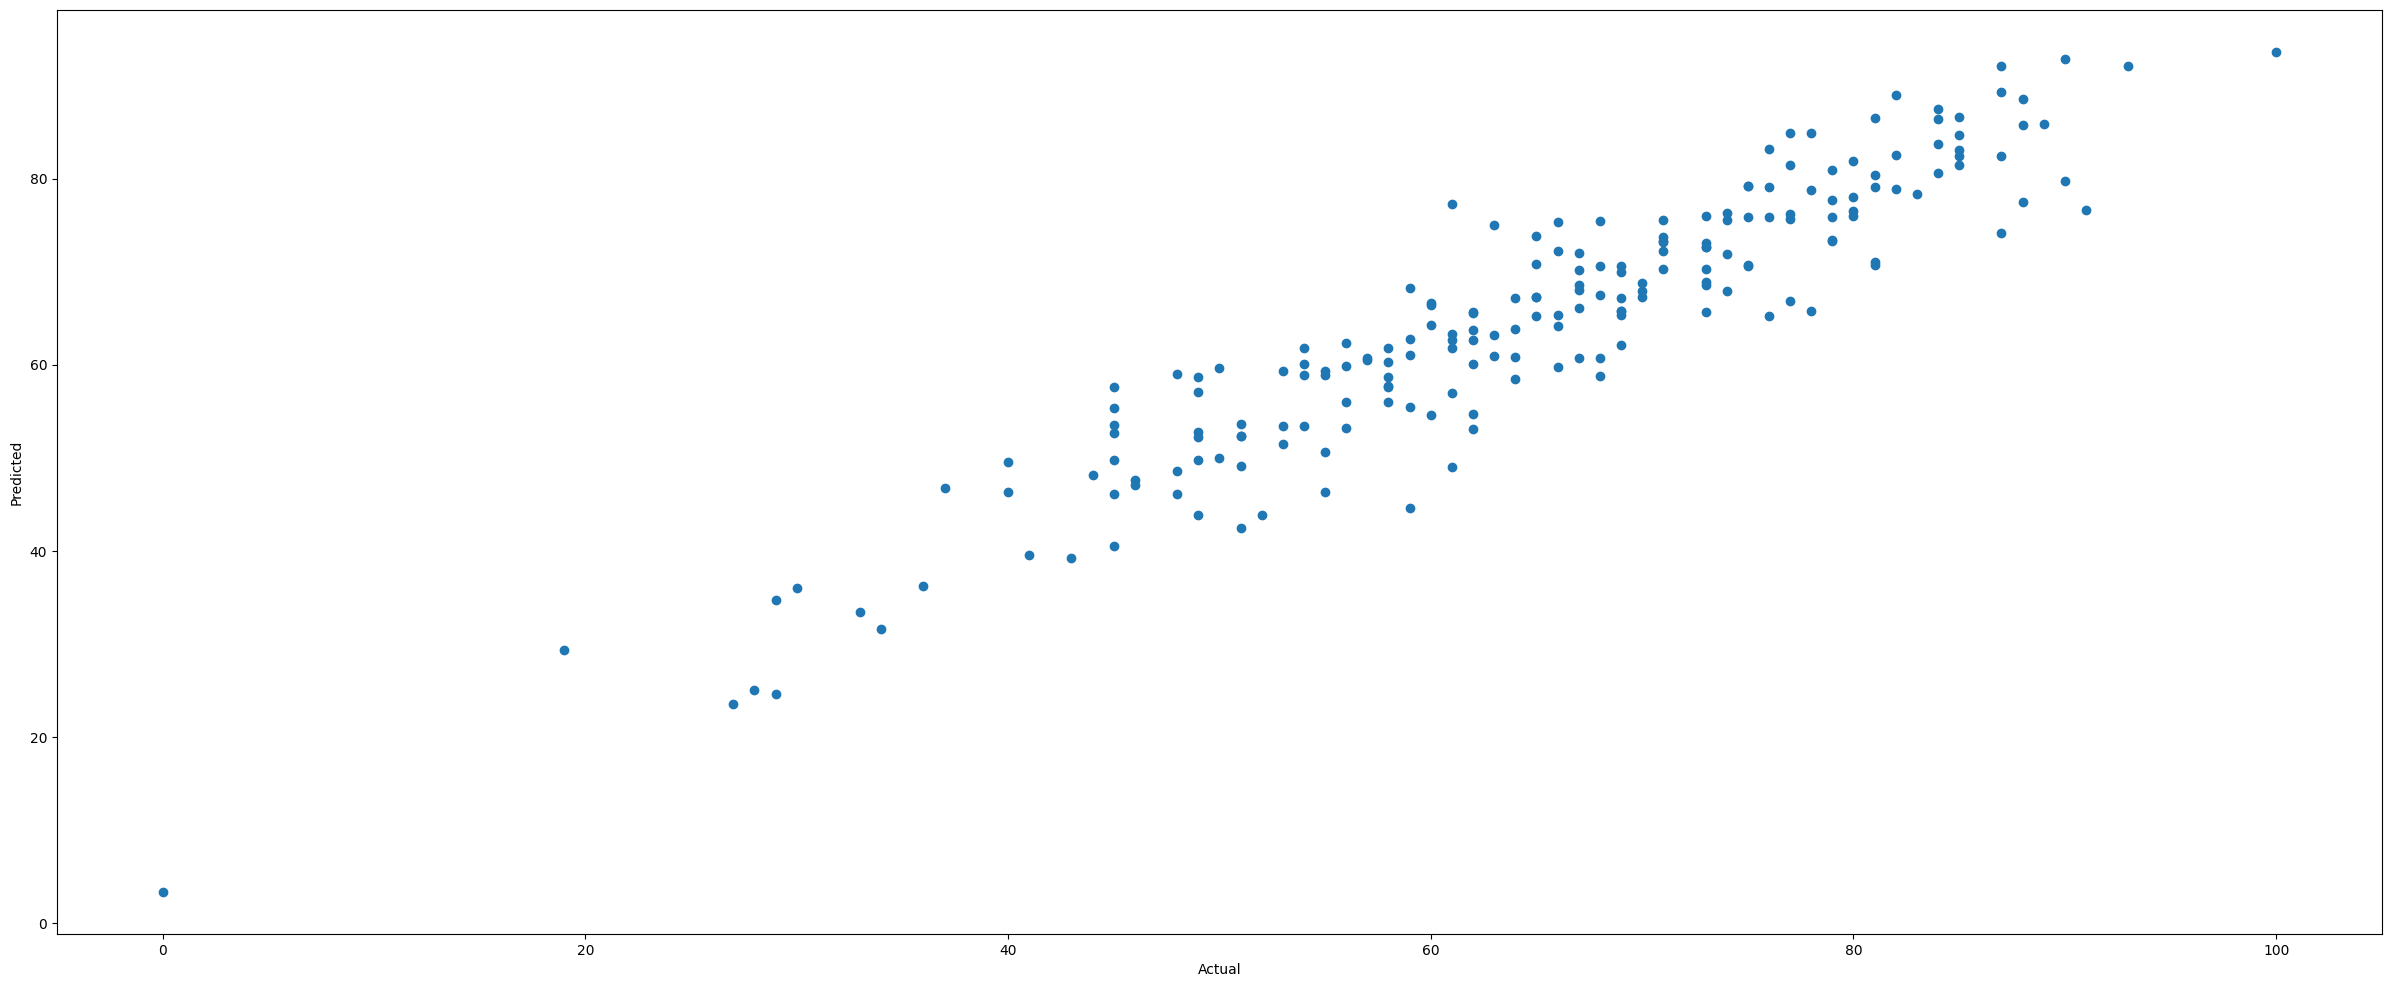

In [52]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

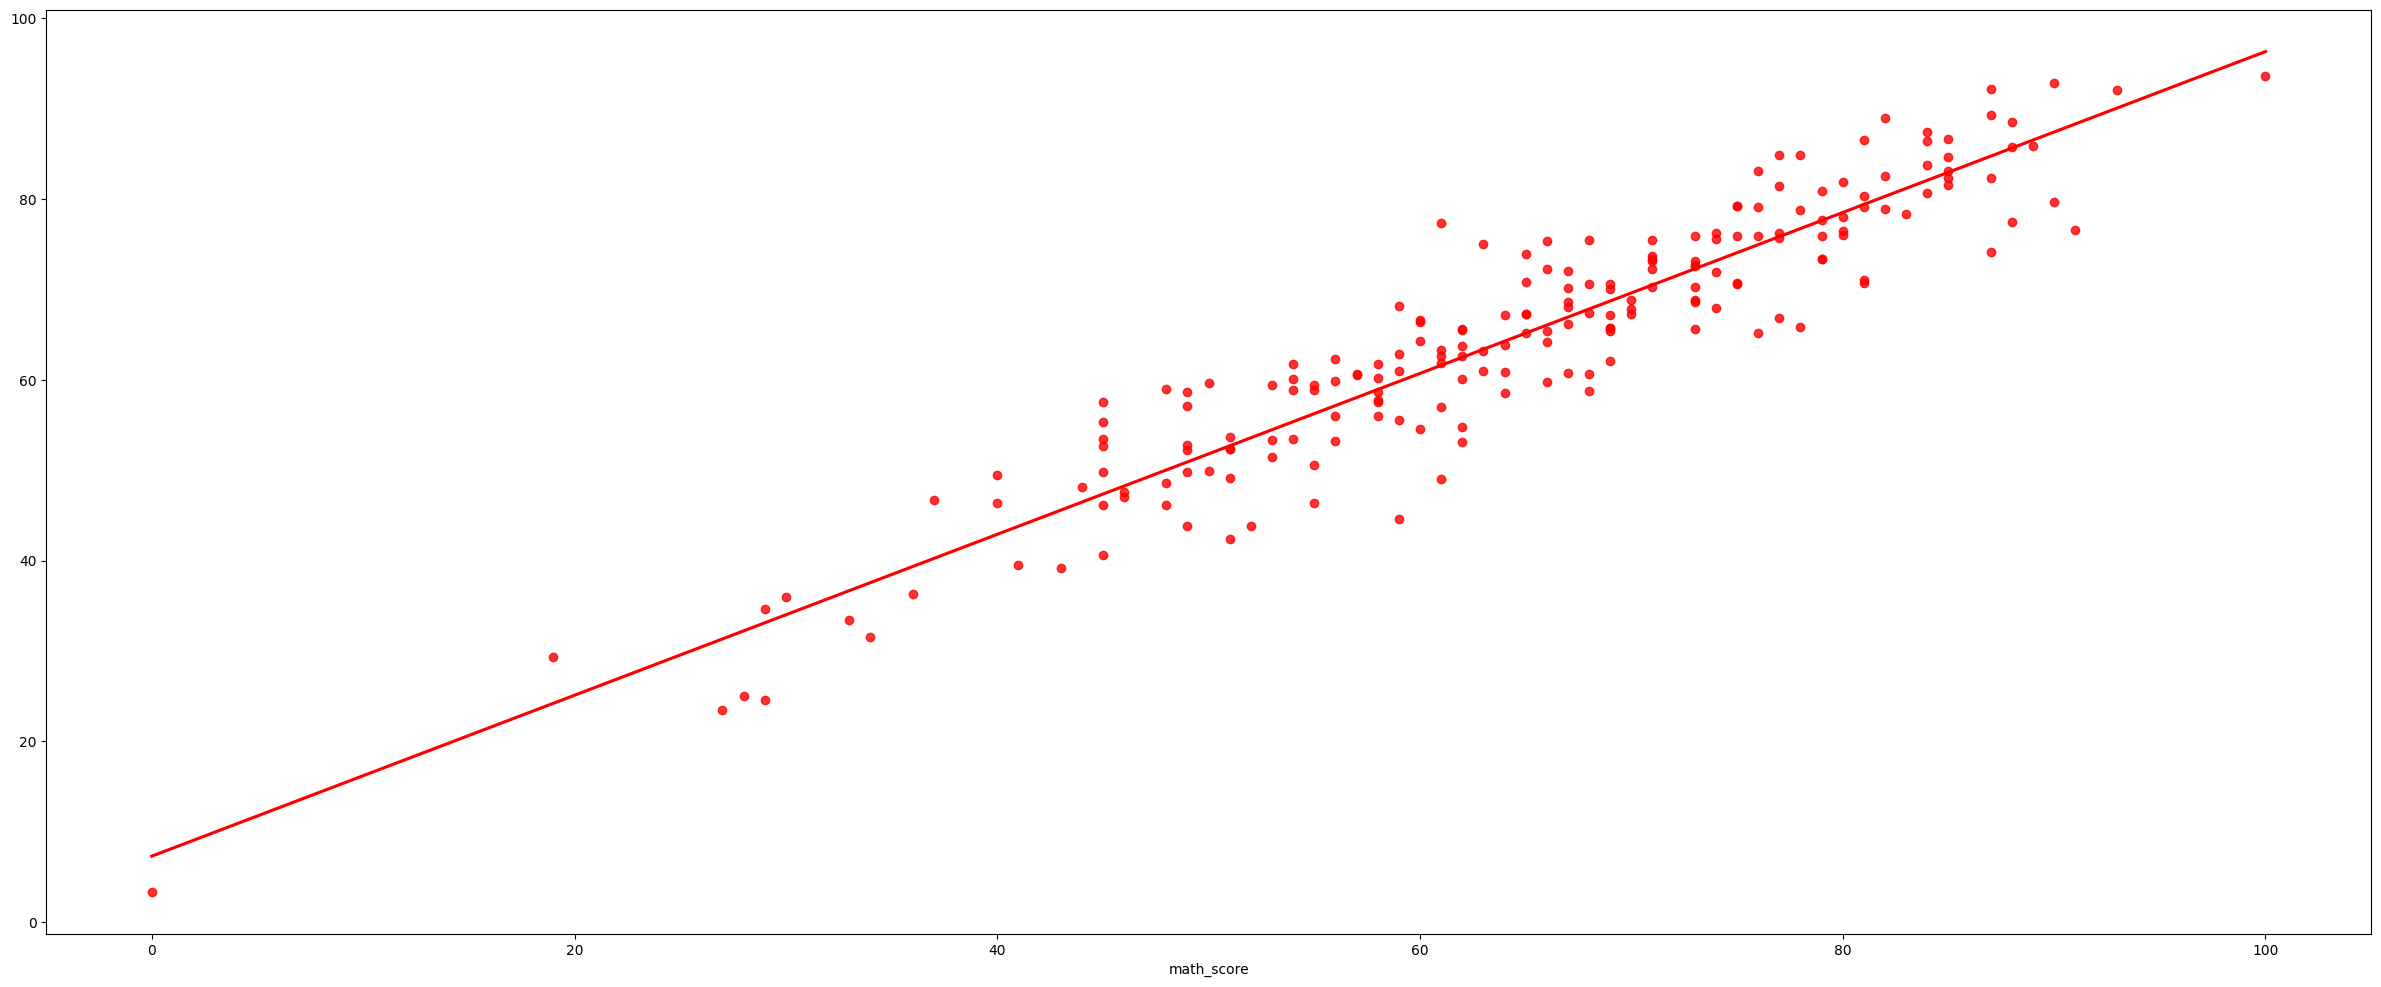

In [53]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');
